In [ ]:
from configparser import ConfigParser

config = ConfigParser()
config.read('config.ini')
config['augmentations']['pad_trunc_noise_multiplier']


In [ ]:
import torch
import ml.machineLearning as machineLearning

model = machineLearning.selectModel()

In [ ]:
from torchsummary import summary
summary(model, (1,257, 63))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file =  './data/JQ_rec.txt'

label_list = [0]
time_list = [0]

with open(file) as f:
    for lbl in f.read().splitlines():
        lbl = lbl.split('\t')

        startTime = int(float(lbl[0]))
        endTime = int(float(lbl[1]))
        num_speakers = int(lbl[2])

        if startTime != time_list[-1]:
            time_list.append(startTime)
            label_list.append(1)
        time_list.append(endTime)
        label_list.append(int(num_speakers))
print(label_list)
print(time_list)
plt.step(time_list, label_list)

c:\Anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
Using cache found in C:\Users\Jian Quan/.cache\torch\hub\pytorch_vision_v0.10.0


nfft64_class0: (1.527775764465332, 0.3520212769508362, 0.3864540159702301, -0.47222423553466797)
nfft64_class1: (1.527775764465332, 0.3520212769508362, 0.3864540159702301, -0.47222423553466797)
nfft64_class2: (1.527775764465332, 0.3520212769508362, 0.3864540159702301, -0.47222423553466797)
nfft128_class0: (1.691104769706726, 0.42361754179000854, 0.4562284052371979, -0.3088952302932739)
nfft128_class1: (1.691104769706726, 0.42361754179000854, 0.4562284052371979, -0.3088952302932739)
nfft128_class2: (1.691104769706726, 0.42361754179000854, 0.4562284052371979, -0.3088952302932739)
nfft256_class0: (1.8206348419189453, 0.49090319871902466, 0.520081639289856, -0.1793651580810547)
nfft256_class1: (1.8206348419189453, 0.49090319871902466, 0.520081639289856, -0.1793651580810547)
nfft256_class2: (1.8206348419189453, 0.49090319871902466, 0.520081639289856, -0.1793651580810547)
nfft512_class0: (1.9418706893920898, 0.5640262365341187, 0.5905556678771973, -0.058129310607910156)
nfft512_class1: (1.94

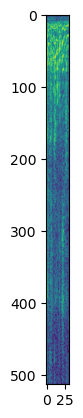

In [1]:
import torch
from loader.AudioDataset import specMask, collate_batch, createDataset
from torch.utils.data import Dataset
import loader.utils as utils
import matplotlib.pyplot as plt
import model
import random

random.seed(10)
torch.manual_seed(10)

linux = '/media/jianquan/Data/Processed Audio/'
windows = 'E:/Processed Audio/'

audio_paths, _ = utils.getAudioPaths(windows)

audio_train_dataset = createDataset(audio_paths, transformParams = utils.getTransforms(False), outputAudio = True)

test_dataloader = torch.utils.data.DataLoader(
    audio_train_dataset,
    batch_size=1,
    num_workers=0,
    shuffle=False,
    collate_fn = collate_batch
)
batch = next(iter(test_dataloader))
batch_size = len(batch[0])

nfftList = [64, 128, 256, 512, 1024]
classList = [0, 1, 2]

for nfft in nfftList:
    for specClass in classList:
        saveName = f'nfft{nfft}_class{specClass}'
        print(saveName, end=': ')
        testModel = model.CNNNetwork(nfft, specClass)
        testModel(batch[0])
        plt.savefig(f'./spec/spec/whisper Norm/{saveName}.png')


# import IPython.display as ipd
# ipd.Audio(batch[0][3], rate = 8000)
# for b in batch[0]:
#     # print(b.max(),b.median(),b.mean(), b.min())
#     # print(b).

    
#     plt.plot(b[0])
#     plt.show()

In [ ]:
import librosa
import librosa.display
import torchaudio
import numpy as np

wav, sr = librosa.load('./data/JQ_rec.wav')

spec = np.abs(librosa.stft(wav[32000:64000], n_fft = 128))

spec = spec/(spec + np.median(spec))

import matplotlib.pyplot as plt

plt.imshow(spec)

In [ ]:
import matplotlib.pyplot as plt
import torch, torchaudio

a = torchaudio.load('/media/jianquan/Data/Original Audio/Singapore Speech Corpus/[P] Part 3 Same BoundaryMic/3003.wav')[0]
b = torchaudio.load('/media/jianquan/Data/Processed Audio/SPEECH/4 Diff Room/sur_2010_6020_phnd_cs-mly.wav')[0]
a

In [ ]:
a = a[0][0:32000]
b = b[0][0:32000]
a.shape

In [ ]:
import torch

for i in range(1000):
    torch.tensor([0,1,2]).repeat(100)